Flux Braiding Glasses

# Initialization (install Packages, load group data, define helpful functions)

## Packages

In [1]:
from qiskit import QuantumCircuit, IBMQ, transpile
from qiskit.providers.aer import AerSimulator
from qiskit.tools.visualization import plot_histogram
import qiskit.tools.jupyter
from qiskit.visualization import plot_histogram, plot_gate_map, plot_circuit_layout
from qiskit.tools.monitor import job_monitor
%qiskit_version_table
%qiskit_copyright
import numpy as np
from time import gmtime, strftime, localtime
import matplotlib.pyplot as plt
%matplotlib inline

## D4 group data

In [2]:
# These permutation matrices compute left multiplication and right multiplication on the group elements as column vectors

import numpy as np

e = np.identity(8)

R_l = np.array([[0,0,0,1,0,0,0,0],
                [1,0,0,0,0,0,0,0],
                [0,1,0,0,0,0,0,0],
                [0,0,1,0,0,0,0,0],
                [0,0,0,0,0,1,0,0],
                [0,0,0,0,0,0,1,0],
                [0,0,0,0,0,0,0,1],
                [0,0,0,0,1,0,0,0]])

R2  = np.array([[0,0,1,0,0,0,0,0],
                [0,0,0,1,0,0,0,0],
                [1,0,0,0,0,0,0,0],
                [0,1,0,0,0,0,0,0],
                [0,0,0,0,0,0,1,0],
                [0,0,0,0,0,0,0,1],
                [0,0,0,0,1,0,0,0],
                [0,0,0,0,0,1,0,0]])

R3_l = np.array([[0,1,0,0,0,0,0,0],
                [0,0,1,0,0,0,0,0],
                [0,0,0,1,0,0,0,0],
                [1,0,0,0,0,0,0,0],
                [0,0,0,0,0,0,0,1],
                [0,0,0,0,1,0,0,0],
                [0,0,0,0,0,1,0,0],
                [0,0,0,0,0,0,1,0]])

m_l = np.array([[0,0,0,0,1,0,0,0],
                [0,0,0,0,0,1,0,0],
                [0,0,0,0,0,0,1,0],
                [0,0,0,0,0,0,0,1],
                [1,0,0,0,0,0,0,0],
                [0,1,0,0,0,0,0,0],
                [0,0,1,0,0,0,0,0],
                [0,0,0,1,0,0,0,0]])

mR_l = np.array([[0,0,0,0,0,1,0,0],
                [0,0,0,0,0,0,1,0],
                [0,0,0,0,0,0,0,1],
                [0,0,0,0,1,0,0,0],
                [0,0,0,1,0,0,0,0],
                [1,0,0,0,0,0,0,0],
                [0,1,0,0,0,0,0,0],
                [0,0,1,0,0,0,0,0]])

mR2_l = np.array([[0,0,0,0,0,0,1,0],
                  [0,0,0,0,0,0,0,1],
                  [0,0,0,0,1,0,0,0],
                  [0,0,0,0,0,1,0,0],
                  [0,0,1,0,0,0,0,0],
                  [0,0,0,1,0,0,0,0],
                  [1,0,0,0,0,0,0,0],
                  [0,1,0,0,0,0,0,0]])

mR3_l = np.array([[0,0,0,0,0,0,0,1],
                  [0,0,0,0,1,0,0,0],
                  [0,0,0,0,0,1,0,0],
                  [0,0,0,0,0,0,1,0],
                  [0,1,0,0,0,0,0,0],
                  [0,0,1,0,0,0,0,0],
                  [0,0,0,1,0,0,0,0],
                  [1,0,0,0,0,0,0,0]])

R_r = np.array([[0,0,0,1,0,0,0,0],
                [1,0,0,0,0,0,0,0],
                [0,1,0,0,0,0,0,0],
                [0,0,1,0,0,0,0,0],
                [0,0,0,0,0,0,0,1],
                [0,0,0,0,1,0,0,0],
                [0,0,0,0,0,1,0,0],
                [0,0,0,0,0,0,1,0]])

R3_r = np.array([[0,1,0,0,0,0,0,0],
                [0,0,1,0,0,0,0,0],
                [0,0,0,1,0,0,0,0],
                [1,0,0,0,0,0,0,0],
                [0,0,0,0,0,1,0,0],
                [0,0,0,0,0,0,1,0],
                [0,0,0,0,0,0,0,1],
                [0,0,0,0,1,0,0,0]])

m_r = np.array([[0,0,0,0,1,0,0,0],
                [0,0,0,0,0,0,0,1],
                [0,0,0,0,0,0,1,0],
                [0,0,0,0,0,1,0,0],
                [1,0,0,0,0,0,0,0],
                [0,0,0,1,0,0,0,0],
                [0,0,1,0,0,0,0,0],
                [0,1,0,0,0,0,0,0]])

mR_r = np.array([[0,0,0,0,0,1,0,0],
                [0,0,0,0,1,0,0,0],
                [0,0,0,0,0,0,0,1],
                [0,0,0,0,0,0,1,0],
                [0,1,0,0,0,0,0,0],
                [1,0,0,0,0,0,0,0],
                [0,0,0,1,0,0,0,0],
                [0,0,1,0,0,0,0,0]])

mR2_r = np.array([[0,0,0,0,0,0,1,0],
                  [0,0,0,0,0,1,0,0],
                  [0,0,0,0,1,0,0,0],
                  [0,0,0,0,0,0,0,1],
                  [0,0,1,0,0,0,0,0],
                  [0,1,0,0,0,0,0,0],
                  [1,0,0,0,0,0,0,0],
                  [0,0,0,1,0,0,0,0]])

mR3_r = np.array([[0,0,0,0,0,0,0,1],
                  [0,0,0,0,0,0,1,0],
                  [0,0,0,0,0,1,0,0],
                  [0,0,0,0,1,0,0,0],
                  [0,0,0,1,0,0,0,0],
                  [0,0,1,0,0,0,0,0],
                  [0,1,0,0,0,0,0,0],
                  [1,0,0,0,0,0,0,0]])

inv = np.array([[1,0,0,0,0,0,0,0],
                [0,0,0,1,0,0,0,0],
                [0,0,1,0,0,0,0,0],
                [0,1,0,0,0,0,0,0],
                [0,0,0,0,1,0,0,0],
                [0,0,0,0,0,1,0,0],
                [0,0,0,0,0,0,1,0],
                [0,0,0,0,0,0,0,1]])

# This function transforms group elements from string format (as written at start of file) to column vector format used in the code. 
# This makes some later functions more readable.

def vector(element):
    if element in ['e']:
        return np.array([1,0,0,0,0,0,0,0])
    elif element in ['R']:
        return np.array([0,1,0,0,0,0,0,0])
    elif element in ['R2']:
        return np.array([0,0,1,0,0,0,0,0])
    elif element in ['R3']:
        return np.array([0,0,0,1,0,0,0,0])
    elif element in ['m']:
        return np.array([0,0,0,0,1,0,0,0])
    elif element in ['mR']:
        return np.array([0,0,0,0,0,1,0,0])
    elif element in ['mR2']:
        return np.array([0,0,0,0,0,0,1,0])
    elif element in ['mR3']:
        return np.array([0,0,0,0,0,0,0,1])

def conjugacy_class(element):
    if element in ['e']:
        return [vector('e')]
    elif element in ['R2']:
        return [vector('R2')]
    elif element in ['R','R3']:
        return [vector('R'),vector('R3')]
    elif element in ['m','mR2']:
       return [vector('m'),vector('mR2')]
    elif element in ['mR','mR3']:
        return [vector('mR'),vector('mR3')]

# Gets the correct matrices for left and right multiplication

def left_mult(element):
    if np.array_equal(element,np.array([1,0,0,0,0,0,0,0])) == True:
        return e
    elif np.array_equal(element,np.array([0,1,0,0,0,0,0,0])) == True:
        return R_l
    elif np.array_equal(element,np.array([0,0,1,0,0,0,0,0])) == True:
        return R2
    elif np.array_equal(element,np.array([0,0,0,1,0,0,0,0])) == True:
        return R3_l
    elif np.array_equal(element,np.array([0,0,0,0,1,0,0,0])) == True:
        return m_l
    elif np.array_equal(element,np.array([0,0,0,0,0,1,0,0])) == True:
        return mR_l
    elif np.array_equal(element,np.array([0,0,0,0,0,0,1,0])) == True:
        return mR2_l
    elif np.array_equal(element,np.array([0,0,0,0,0,0,0,1])) == True:
        return mR3_l

def right_mult(element):
    if np.array_equal(element,np.array([1,0,0,0,0,0,0,0])) == True:
        return e
    elif np.array_equal(element,np.array([0,1,0,0,0,0,0,0])) == True:
        return R_r
    elif np.array_equal(element,np.array([0,0,1,0,0,0,0,0])) == True:
        return R2
    elif np.array_equal(element,np.array([0,0,0,1,0,0,0,0])) == True:
        return R3_r
    elif np.array_equal(element,np.array([0,0,0,0,1,0,0,0])) == True:
        return m_r
    elif np.array_equal(element,np.array([0,0,0,0,0,1,0,0])) == True:
        return mR_r
    elif np.array_equal(element,np.array([0,0,0,0,0,0,1,0])) == True:
        return mR2_r
    elif np.array_equal(element,np.array([0,0,0,0,0,0,0,1])) == True:
        return mR3_r



## Functions

In [3]:
def swapPositions(list, pos1, pos2):
     
    list[pos1], list[pos2] = list[pos2], list[pos1]
    return list

def flip(x):
    if x==0: return 1 
    else: return 0

def flipall(x):
    return [flip(k) for k in x]

def convert(result, measuredbits):
    array=[list(map(lambda x: int(x),list(k))) for k in result.keys() for x in range(0,result[k])]
    for m in array:
        m.reverse()
    array = [k[0:measuredbits] for k in array]    
    return array   

## Define map from old to new qubits

In [4]:
# Mapping the old layout to the qubits of the IBM machine

g0=0
g1=1
g2=2
g3=3
g4=4
g5=5
g6=6
g7=7
g8=8
g9=9
g10=10
g11=11

g12=12
#g13=13
g14=13
#g15=15
g16=14
g17=15
g18=16
g19=17

g20=20
g21=21
g22=22
g23=23
g24=24
g25=25
g26=26

G=[g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g14,g16,g17,g18,g19]

## Set Measurement parameters (obsolete)

In [5]:
# Set the measurement you want to either 'charge' or 'flux' or 'both'.
# measurement_type = 'both'

# Set the initial state to 'identity', 'ground state' or 'random'

#initial_state = 'ground state'

# Set whether or not a ribbon is applied (True/False)

#ribbon = True

# There are two possible ribbons: '1' corresponds to the interacting braids, '2' to the two unlinked loops
#ribbon_order = '1'

# Number of repetitions 

# repetitions = 10

# Define Circuit

## Prepare initial state

In [6]:
# Initialize Qubits
def circ_initialstate(initial_state):
    
    circ = QuantumCircuit(18, 18)


    if initial_state == 'ground state':
    # Prepare groundstate

        circ.h(g0)
        circ.h(g1)
        circ.h(g2)
        circ.h(g9)
        circ.h(g10)
        circ.h(g11)


        circ.cx(g0,g3)
        circ.cx(g1,g4)
        circ.cx(g2,g5)
        circ.cx(g9,g6)
        circ.cx(g10,g7)
        circ.cx(g11,g8)

    if initial_state == 'random':

        omegas = [np.random.rand() * np.pi * 2 for i in range(23)]
        phis = [np.random.rand() * np.pi * 2 for i in range(23)]
        thetas = [np.arccos(2 * np.random.rand() - 1) for i in range(23)]    

        for i in range(23):
            circ.rz(omegas[i],i)
        for i in range(23):
            circ.rx(phis[i],i)
        for i in range(23):
            circ.rz(thetas[i],i)
    return circ            

## Ribbon operators

Then the ribbon operators. They both use two ancillas in a Bell state, with one of the ancillas moved around the circuit and interacting with the edges. Multiplication circuits for the conjugacy class $\{R,R^3\}$.

In [7]:
def circ_add_ribbon(circ, ribbon, ribbon_order):
    if ribbon and ribbon_order == '1':

          # Set up two bell pairs

            circ.h(g16)                                     # Blue ribbon
            circ.cx(g16,g17)

            circ.h(g18)                                     # Red ribbon
            circ.cx(g18,g19)

          # Create two particle pairs: multiply blue into edge 4 and red into edge 1

            circ.cx(g17,g10)                       # blue onto edge 4
            #circ.swap(g10,g11)
            circ.cx(g9,g10)
            #circ.swap(g10,g11)
            circ.cx(g11,g10)                       # SWAP + CNOT = 2 CNOTs
           # circ.cx(g11,g10)
            circ.x(g11)

            #circ.swap(g19,g0)                         # red onto edge 1
            circ.cx(g2,g1)
            circ.cx(g19,g1)
            circ.x(g1)                
                                                                          # note: qubits 19 and 0 not yet swapped back

          # Sigma 1

            #circ.swap(g9,g10)
            #circ.swap(g11,g7)
            circ.cx(g9,g16)                        # Conjugate back of ribbon by edge 4
            circ.cx(g17,g9)                        # Start multiplying front into edge 3
            #circ.swap(g9,g10)
            #circ.swap(g11,g7)

            #circ.swap(g10,g11)                        # multiply front into edge 3, back into edge 4
            #circ.swap(g7,g8)
            circ.cx(g16,g10)
            circ.cx(g6,g7)

            circ.cx(g11,g10)
  #          circ.swap(g11,g10)
            
  #          circ.cx(g11,g10)
  #          circ.cx(g10,g11)


            #circ.swap(g7,g8)
            circ.cx(g8,g7)
            circ.x(g8)
            circ.x(g10)
            circ.x(g11)

            ##circ.swap(g16,g20)                         # move back of ancilla and conjugate by edge 4
            circ.cx(g9,g16)



          # Sigma 2

            circ.cx(g3,g19)                           # Conjugate red by edge 2, swap back
            #circ.swap(g19,g0)                
            circ.cx(g9,g16)                          # Conjugate blue by edge 4

            #circ.swap(g19,g17)                         # Cross over: front ends of two ribbons go past each other
            #circ.swap(g0,g1)
            circ.cx(g0,g16)                          # Conjugate blue by edge 1

            #circ.swap(g0,g1)
            ##circ.swap(g19,g20)
            #circ.swap(g6,g7)
            #circ.swap(g6,g11)
            circ.cx(g6,g19)                         # Conjugate red by edge 3
            #circ.swap(g6,g11)
            #circ.swap(g6,g7)


          # Fusion 1

            #circ.swap(g9,g11)
            circ.cx(g9,g19)                          # Conjugate red by edge 4
            circ.cx(g0,g19)                           # Conjugate by edge 1
            #circ.swap(g9,g11)


          # Fusion 2

            #circ.swap(g3,g4)                             # Multiply back of red into edge 2
            circ.cx(g18,g4)

            #circ.swap(g3,g4)

            circ.cx(g5,g4)
            circ.x(g5)
            circ.cx(g3,g18)                            # Conjugate red by edge 2

            ##circ.swap(g18,g17)
            circ.cx(g8,g7)
            #circ.swap(g19,g17)
            #circ.swap(g8,g10)
            circ.cx(g18,g7)                           # Multiply back of red into edge 3
            #circ.swap(g8,g10)
            circ.x(g7)
            circ.x(g8)

            #circ.swap(g6,g7)
            #circ.swap(g18,g19)
            #circ.swap(g6,g11)
            circ.cx(g6,g18)                           # Conjugate red by edge 3
            #circ.swap(g6,g11)
            #circ.swap(g6,g7)


          # Measuring ribbons in bell state. Must bring ribbons back together first

          # Blue: back is at qubits 20, front is at qubit 18
          # Red: front is at qubit 17, back is at qubit 16

            ##circ.swap(g17,g20)
            ##circ.swap(g17,g19)
            #circ.swap(g18,g19)

            circ.cx(g16,g17)
            circ.h(g16)

            circ.cx(g18,g19)
            circ.h(g18)
    if ribbon and ribbon_order == '2':

          # Set up two bell pairs

          circ.h(g17)                                     # Blue ribbon
          circ.cx(g17,g16)

          circ.h(g18)                                     # Red ribbon
          circ.cx(g18,g19)

          # Create two particle pairs: multiply blue into edge 4 and red into edge 1

          #circ.swap(g10,g11)
          circ.cx(g16,g10)                      # blue onto edge 4
          circ.cx(g9,g10)

          #circ.swap(g10,g11)
          circ.cx(g11,g10) 

          circ.x(g11)

          #circ.swap(g19,g0)                        # red onto edge 1
          circ.cx(g2,g1)
          circ.cx(g19,g1)
          circ.x(g2)                                        # note: qubits 19 and 0 not yet swapped back


          # Sigma 2

          circ.cx(g3,g19)                         # conjugate red by edge 2
          #circ.swap(g19,g0)
          #circ.swap(g9,g10)
          #circ.swap(g19,g17)
          circ.cx(g9,g16)                       # conjugate blue by edge 4 and then 1
          circ.cx(g0,g16)
          #circ.swap(g9,g10)
          #circ.swap(g6,g8)
          #circ.swap(g6,g7)
          #circ.swap(g19,g11)
          circ.cx(g6,g19)                         # conjugate red by edge 3


        # have not swapped everything back yet!!


          # Sigma 1

          circ.cx(g9,g17)                          # conjugate back of blue by edge 4

          circ.cx(g8,g7)                           # multiply red into edge 3
          #circ.swap(g7,g6)
          circ.cx(g6,g7)  

          circ.cx(g19,g7)
          #circ.swap(g6,g8)
          circ.x(g8)

          #circ.swap(g20,g16)                         # swap front and back of ribbon around             
          circ.cx(g17,g10)                         # multiply back of blue into edge 4, R2 qubit in position 17 still
          #circ.swap(g19,g11)                         # move front of red ribbon back to 17
          circ.cx(g11,g10)
          circ.x(g11)
          circ.x(g10)

          #circ.swap(g9,g10)
          circ.cx(g9,g17)                          # and conjugate the ancilla by edge 4 again


          # qubits representing m and R on edge 4 are still swapped

          # Fusion 1

          circ.cx(g9,g17)                       # conjugate ancilla by edge 4 again
          #circ.swap(g9,g10)                        # SWAP back
          circ.cx(g0,g17)                         # conjugate back of blue ribbon by edge 1

          # Fusion 2

          #circ.swap(g3,g4)                             # Multiply back of red into edge 2
          circ.cx(g18,g4)

          #circ.swap(g3,g4)

          circ.cx(g5,g4)
          circ.x(g5)
          circ.cx(g3,g18)                            # Conjugate red by edge 2

          #circ.swap(g18,g17)
          circ.cx(g8,g7)
          #circ.swap(g19,g17)
          #circ.swap(g18,g11)
          circ.cx(g18,g7)                           # Multiply back of red into edge 3
          circ.x(g7)
          circ.x(g8)

          #circ.swap(g7,g9)
          #circ.swap(g7,g10)
          circ.cx(g6,g18)                          # conjugate red by edge 3 and move it all back
          #circ.swap(g7,g10)
          #circ.swap(g7,g9)
          #circ.swap(g18,g11)


          # Measuring ribbons in bell state.

          # Blue: back is at qubits 16, front is at qubit 21
          # Red: front is at qubit 19, back is at qubit 17

          circ.cx(g17,g16)
          circ.h(g17)

          circ.cx(g18,g19)
          circ.h(g18)
    return circ               

## Measurement

Then add measurements. Flux is measured by simply measuring qubits in the computational, charge is measured with a somewhat more complicated protocol. It uses the subgroup $\{e,m,R^2,mR^2\}$, which means it detects certain charges only. Additionally, the four qubits corresponding to the ribbon ancillas are measured, and post selection ensures the ribbons have projected out correctly.

In [8]:
# Charge measurement setup for edges 3 and 4

def circ_add_measurement(circ, measurement_type, ribbon):

    if measurement_type == 'flux':
      if ribbon:
        measuredbits=16
        circ.measure(G[0:12]+[g16,g17,g18,g19],range(measuredbits))
      else:
        measuredbits=12
        circ.measure(G[0:12],range(measuredbits))

    if measurement_type == 'charge':
      circ.h(g12)
      circ.h(g14)        # Set up superposition of subgroup {e,m,R2,mR2}. Qubit 12 encodes m, qubit 14 encodes R2.

     # circ.cx(g12,g13)         # Multiply onto neighbouring ancillas
    #  circ.cx(g14,g15)

      circ.cx(g12,g9)          # Multiply into the edges 3 and 4 that make up a plaquette, acting on the m and R2 qubits.
      circ.cx(g12,g6)
      circ.cx(g14,g10)
      circ.cx(g14,g7)

      #circ.cx(g12,g13)         # Undo multiplication onto the additional ancillas
      #circ.cx(g14,g15)

      circ.h(g12)
      circ.h(g14)        # Hadamard back

      # measure the two qubits encoding the subgroup
      if ribbon:
        measuredbits=6
        circ.measure([g12,g14] + [g16,g17,g18,g19],range(measuredbits))
      else:
        measuredbits=2
        circ.measure([g12,g14],range(measuredbits))

    if measurement_type == 'both':
      circ.h(g12)
      circ.h(g14)        # Set up superposition of subgroup {e,m,R2,mR2}. Qubit 12 encodes m, qubit 14 encodes R2.

 #     circ.cx(g12,g13)         # Multiply onto neighbouring ancillas
  #    circ.cx(g14,g15)

      circ.cx(g12,g9)          # Multiply into the edges 3 and 4 that make up a plaquette, acting on the m and R2 qubits.
      circ.cx(g12,g6)
      circ.cx(g14,g10)
      circ.cx(g14,g7)

  #    circ.cx(g12,g13)         # Undo multiplication onto the additional ancillas
  #    circ.cx(g14,g15)

      circ.h(g12)
      circ.h(g14)               # Hadamard back

      if ribbon:
        measuredbits=12    
        circ.measure(G[6:12] + [g12,g14,g16,g17,g18,g19],range(measuredbits))
      else:
        measuredbits=8
        circ.measure(G[6:12] + [g12,g14],range(measuredbits))
    return circ    

def how_many_bits(measurement_type, ribbon):
    if measurement_type == 'flux':
        if ribbon:
            measuredbits=16
        else:
            measuredbits=12
    if measurement_type == 'charge':     
        if ribbon:
            measuredbits=6
        else:
            measuredbits=2
    if measurement_type == 'both':
        
        if ribbon:
            measuredbits=12    
        else:
            measuredbits=8
    return measuredbits

## Compose

In [9]:
def compose_circuit(measurement_type, initial_state, ribbon, ribbon_order):
    circ = circ_initialstate(initial_state)
    circ_add_ribbon(circ, ribbon, ribbon_order)
    circ_add_measurement(circ, measurement_type, ribbon)
    return circ

# Process Results

In [10]:
def processmeasurement(measurements, ribbon, measurement_type):
    
    # Results in array form: if there is a ribbon, pick out only the correct ones.


    if ribbon:
      measurements_filtered = []
      for mmt in measurements:
        if np.array_equal(mmt[-4:],[0,0,0,0]):
          measurements_filtered.append(mmt[:-4])
      measurements = measurements_filtered

    repetitions_filtered = len(measurements)
    
 
   

    
    if measurement_type == 'flux':
      centre = 0

      for mmt in measurements:
        edge1 = np.kron(np.eye(2)[:,mmt[0]],
                      np.kron(np.eye(2)[:,mmt[1]],
                              np.eye(2)[:,mmt[2]]
                              ))
        edge2 = np.kron(np.eye(2)[:,mmt[3]],
                      np.kron(np.eye(2)[:,mmt[4]],
                              np.eye(2)[:,mmt[5]]
                              ))
        edge3 = np.kron(np.eye(2)[:,mmt[6]],
                      np.kron(np.eye(2)[:,mmt[7]],
                              np.eye(2)[:,mmt[8]]
                              ))
        edge4 = np.kron(np.eye(2)[:,mmt[9]],
                      np.kron(np.eye(2)[:,mmt[10]],
                              np.eye(2)[:,mmt[11]]
                              ))

        centre_flux = left_mult(edge2) @ left_mult(inv @ edge1) @ left_mult(inv @ edge3) @ edge4

        if np.array_equal(centre_flux,vector('e')):
          centre += 1
        return centre
    
    if measurement_type == 'charge':
      count00 = 0
      count01 = 0
      count10 = 0
      count11 = 0

      for mmt in measurements:
        if np.array_equal(mmt[0:2],[0,0]):
          count00 += 1
        if np.array_equal(mmt[0:2],[0,1]):
          count01 += 1
        if np.array_equal(mmt[0:2],[1,0]):
          count10 += 1
        if np.array_equal(mmt[0:2],[1,1]):
          count11 += 1

      return([count00,count01,count10,count11])
    
    if measurement_type == 'both':
    
      output = np.zeros((4,8))
      for mnt in measurements:
          if np.array_equal(mnt[-2:],[0,0]):
            index1 = 0
          if np.array_equal(mnt[-2:],[0,1]):
            index1 = 1
          if np.array_equal(mnt[-2:],[1,0]):
            index1 = 2
          if np.array_equal(mnt[-2:],[1,1]):
            index1 = 3

          edge3 = np.kron(np.eye(2)[:,mnt[0]],
                        np.kron(np.eye(2)[:,mnt[1]],
                                np.eye(2)[:,mnt[2]]
                                ))
          edge4 = np.kron(np.eye(2)[:,mnt[3]],
                        np.kron(np.eye(2)[:,mnt[4]],
                                np.eye(2)[:,mnt[5]]
                                ))
          flux = left_mult(edge3) @ inv @ edge4

          for i in range(8):
            g = np.zeros(8)
            g[i] = 1
            if np.array_equal(flux,g):
              index2 = i

          output[index1][index2] += 1
      return output    
    

# Transpile Circuit

### Comments

We call `from_backend` to create a simulator for `ibmq_mumbai`

By storing the device properties in `simulator`, we ensure that the appropriate basis gates and coupling map are used when compiling circuits for simulation, thereby most closely mimicking the gates that will be executed on a real device. In addition `simulator` contains an approximate noise model consisting of:

* **Single-qubit gate errors** consisting of a single qubit depolarizing error followed by a single qubit thermal relaxation error.
* **Two-qubit gate errors** consisting of a two-qubit depolarizing error followed by single-qubit thermal relaxation errors on both qubits in the gate.
* **Single-qubit readout errors** on the classical bit value obtained from measurements on individual qubits.

For the gate errors the error parameter of the thermal relaxation errors is derived using the `thermal_relaxation_error` function from `aer.noise.errors` module, along with the individual qubit $T_1$ and $T_2$ parameters, and the `gate_time` parameter from the device backend properties. The probability of the depolarizing error is then set so that the combined average gate infidelity from the depolarizing error followed by the thermal relaxation is equal to the `gate_error` value from the backend properties.

For the readout errors the probability that the recorded classical bit value will be flipped from the true outcome after a measurement is given by the qubit `readout_errors`.

Once we have created a noisy simulator backend based on a real device we can use it to run noisy simulations.

**Important:** When running noisy simulations it is *critical* to `transpile` the circuit for the backend so that the circuit is transpiled to the correct noisy basis gate set for the backend.

In [11]:
local_layout_old=[15,18,21, 16,19,22, 4, 10,7, 5,11,8,3,14,13,12,0,1] 
local_layout=[15,18,21, 16,19,22, 4, 10,7, 8,5, 3,2,1,13,12,11,14] 


def transpile_circuit(circ, minimum, iterations, layout):

    from qiskit.providers.fake_provider import FakeMumbai

    # Get a fake backend from the fake provider
    backend = FakeMumbai()

    sim = AerSimulator.from_backend(backend)

    # We want to get a short circuit, let the transpiler try to minimize and accept only circuits with a depth below min

    # Transpile the circuit for the noisy basis gates
    for i in range(iterations):
        if layout == True:
            ttest= ttest = transpile(circ, sim, initial_layout = local_layout, optimization_level=3)
        else:
            ttest = transpile(circ, sim, optimization_level=3)
        testmin=ttest.depth()
        if testmin< minimum:
            minimum=testmin
            tcirc=ttest
            print(minimum) 
    return tcirc            

# Generate Circuit and Results

In [20]:
def run_circuit(measurement_type, state, ribbon, ribbon_order, samples, noisy, minimum, iterations, layout):
    circ=compose_circuit(measurement_type, state, ribbon, ribbon_order)
    if noisy == True:
        
        print(strftime("%Y-%m-%d %H:%M:%S", localtime()))
        from qiskit.providers.fake_provider import FakeMumbai

        backend = FakeMumbai()
        sim = AerSimulator.from_backend(backend)
        tcirc = transpile_circuit(circ,minimum,iterations, layout)
        print(strftime("%Y-%m-%d %H:%M:%S", localtime()))
    else:
        sim = AerSimulator()
        tcirc = transpile(circ, sim)
    print(plot_circuit_layout(tcirc,backend))    
    result = sim.run(tcirc,shots=samples).result()
    print(strftime("%Y-%m-%d %H:%M:%S", localtime()))
    counts = result.get_counts(0)
    measuredbits=how_many_bits(measurement_type,ribbon)
    measurements=convert(counts, measuredbits)
    results = processmeasurement(measurements, ribbon, measurement_type)
    return results


In [15]:
results_clean1=run_circuit('both', 'ground state', True, '1', 2000, False, 100, 10, True)
print(results_clean1)
results_clean2=run_circuit('both', 'ground state', True, '2', 2000, False, 100, 10, True)
print(results_clean2)

2022-09-23 14:22:42
[[32.  0. 26.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [30.  0. 21.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]]
2022-09-23 14:22:42
[[2000.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.]]


In [21]:
results_noise1=run_circuit('both', 'ground state', True, '1', 1, True, 100, 100, True)
#results_noise1=run_circuit('both', 'ground state', True, '1', 1, True, 100, 10, False)

print(results_noise1)

#results_noise2=run_circuit('both', 'ground state', True, '2', 10, True, 100, 1000, True)
#results_noise2=run_circuit('both', 'ground state', True, '2', 1, True, 100, 10, False)

#print(results_noise2)

2022-09-23 14:25:29
90
87
2022-09-23 14:25:57
Figure(500x500)
2022-09-23 14:26:00
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


91
87


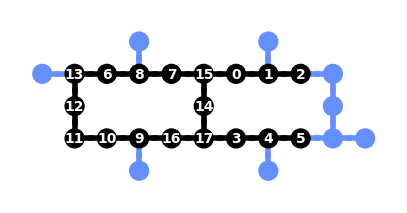

In [25]:
from qiskit.providers.fake_provider import FakeMumbai

    # Get a fake backend from the fake provider
backend = FakeMumbai()

circ=compose_circuit('both', 'ground state', True, '1')
tcirc=transpile_circuit(circ, 100,100, True)
plot_circuit_layout(tcirc,backend)